
# <h1 style="background-color: rgba(128, 128, 128, 0.29)"><center>**_Sentiment Analysis Project_ 🙂😐😠**</center></h1> 


>## **IMPORT THE LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, f1_score , classification_report
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
# from keras.layers import Embedding, LSTM, Dense, SimpleRNN , Tokenizer
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.pipeline import Pipeline

****

> ## **DATA ANALYSIS**



### <font color='#ddd'>**▶️ Data Ingesion**</font>

In [ ]:
data = pd.read_csv('sentimentdataset.csv')
data.head(5)

### <font color='#ddd'>**▶️ Data Description**</font>

In [ ]:
data.info()

_________________________________________________________________________________

> ## **DATA PREPROCESSING**

### <font color='#ddd'>**▶️ Punctuation**</font>


In [ ]:
punct = string.punctuation
punct

### <font color='#ddd'>**▶️ Stop Words List**</font>


In [ ]:
stop_words = nltk.corpus.stopwords.words('english')
stop_words

### <font color='#ddd'>**▶️ Slang Dictionary**</font>

In [ ]:
slang_dict = {
    "lol": "laughing out loud",
    "brb": "be right back",
    "tbh": "to be honest",
    "idk": "I don't know",
    "imo": "in my opinion",
    "imho": "in my humble opinion",
    "btw": "by the way",
    "bff": "best friends forever",
    "fomo": "fear of missing out",
    "icymi": "in case you missed it",
    "jsyk": "just so you know",
    "omg": "oh my god",
    "rofl": "rolling on the floor laughing",
    "smh": "shaking my head",
    "tmi": "too much information",
    "ttyl": "talk to you later",
    "afk": "away from keyboard",
    "bfn": "bye for now",
    "gr8": "great",
    "np": "no problem",
    "pls": "please",
    "thx": "thanks",
    "afaik": "as far as I know",
    "b4": "before",
    "cu": "see you",
    "dunno": "don't know",
    "gonna": "going to",
    "lemme": "let me",
    "l8r": "later",
    "nite": "night",
    "ppl": "people",
    "tho": "though",
    "u": "you",
    "ur": "your",
    "wanna": "want to",
    "wut": "what",
    "w/o": "without",
    "bday": "birthday",
    "fwiw": "for what it's worth",
    "hmu": "hit me up",
    "irl": "in real life",
    "jk": "just kidding",
    "lmao": "laughing my ass off",
    "lmk": "let me know",
    "omw": "on my way",
    "rly": "really",
    "tbf": "to be fair",
    "tldr": "too long; didn't read",
    "wyd": "what are you doing",
    "wym": "what do you mean",
    "yolo": "you only live once",
    "btwn": "between",
    "cya": "see ya",
    "fav": "favorite",
    "gratz": "congratulations",
    "plz": "please",
    "thru": "through",
    "totes": "totally",
    "ttyt": "talk to you tomorrow",
    "wb": "welcome back",
    "wbu": "what about you",
    "yw": "you're welcome",
    "bffl": "best friends for life",
    "m8": "mate",
    "nvm": "never mind",
    "rsvp": "please respond",
    "tfw": "that feeling when",
    "idc": "I don't care",
    "wtf": "what the heck"
}

### <font color='#ddd'>**▶️ Lemmatizer Object**</font>

In [ ]:
lemmatizer = nltk.WordNetLemmatizer()

### <font color='#ddd'>**▶️ Preprocessing Function**</font>


In [ ]:
def data_preprocessing(text):
    # Remove The Punctuation
    clean_txt = "".join([char for char in text if char not in punct])
    # Remove The Emojis
    clean_txt  = re.sub(
        r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-'
        r'\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-'
        r'\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251]+',
        '', clean_txt)
    # Convert Text To Lower Case
    clean_txt = clean_txt.lower()
    # Split The Text To Words
    clean_txt = clean_txt.split()
    # Convert the Slang Terms
    clean_txt = [slang_dict.get(word, word) for word in clean_txt]
    # Remove The Stop Words
    for word in stop_words:
        if word.__contains__("n't"):
            stop_words.remove(word)
        if word == "not":
            stop_words.remove(word)
    clean_txt = [word for word in clean_txt if word not in stop_words]
    # Lemmatizing
    clean_txt = [lemmatizer.lemmatize(word) for word in clean_txt]
    return " ".join(clean_txt)

### <font color='#ddd'>**▶️ Apply the Preprocessing Function On Text Column**</font>

In [ ]:
data['Clean Text'] = data['Text'].apply(lambda x: data_preprocessing(x))
data[['Text' , 'Clean Text']].head(5)

### <font color='#ddd'>**▶️ Apply the Preprocessing Function On Topic Column**</font>


In [ ]:
data['Clean Topic'] = data['Topic'].apply(lambda x: data_preprocessing(x))
data[['Topic' , 'Clean Topic']].head(5)

### <font color='#ddd'>**▶️ Delete Useless Columns**</font>

In [ ]:
data = data.drop(columns=['User', 'Timestamp', 'Text', 'Topic', 'Year', 'Month', 'Day', 'Hour', 'Source', 'ID'])
data

****

> ## **Sentiments ENCODING**

### <font color='#ddd'>**▶️ Convert The Column Of The Sentiment To Three Unique Values**</font>

In [ ]:
analysis = SentimentIntensityAnalyzer()
def convert_sentiment(word):
    sentiment_scores = analysis.polarity_scores(word)
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

### <font color='#ddd'>**▶️ Apply the Convert function on Sentiment Column**</font>

In [ ]:
data['New Sentiments'] = data['Sentiment (Label)'].apply(lambda x: convert_sentiment(x))

### <font color='#ddd'>**▶️ Sentiments Description**</font>

In [ ]:
data['Sentiment (Label)'].value_counts()

In [ ]:
data['New Sentiments'].value_counts()

### <font color='#ddd'>**▶️ Convert The Sentiment Values To Numerical Values**</font>


In [ ]:
def convert_sentiment_to_number(sentiment):
    if sentiment == 'Positive':
        return 1
    elif sentiment == 'Negative':
        return -1
    elif sentiment == 'Neutral':
        return 0

data['Numerical_Sentiments'] = data['New Sentiments'].apply(lambda x: convert_sentiment_to_number(x))
data['Numerical_Sentiments']

### <font color='#ddd'>**▶️ Delete 'Sentiment (Label)' & 'New Sentiments'**</font>


In [ ]:
data = data.drop(columns=['Sentiment (Label)', 'New Sentiments'])
data

### <font color='#ddd'>**▶️ Correlation**</font>

In [ ]:
correlation = data[['Likes' , 'Retweets' , 'Numerical_Sentiments']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### <font color='#ddd'>**▶️ Delete 'Likes' & 'Retweets' Columns**</font>

In [ ]:
data = data.drop(columns=['Likes', 'Retweets'])
data

****

> ## **TRAINING & Model Evaluation**

### <font color='#ddd'>**▶️ Data Spliting**</font>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data['Clean Text'] + " " + data['Clean Topic'] , 
data['Numerical_Sentiments'], test_size=0.1, random_state=0,
stratify= data['Numerical_Sentiments'] , shuffle=True)

In [89]:
y_test.value_counts()

Numerical_Sentiments
 1    38
-1    19
 0    17
Name: count, dtype: int64

<center>==================================================</center>

### <font color='#ddd'>**▶️ Naive Bayes**</font>


<ul>
    <font color='#ddd'><li>Bag Of Words</li></font>
</ul>

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95        19
           0       0.88      1.00      0.94        15
           1       0.97      0.93      0.95        40

    accuracy                           0.95        74
   macro avg       0.93      0.96      0.94        74
weighted avg       0.95      0.95      0.95        74



<Axes: >

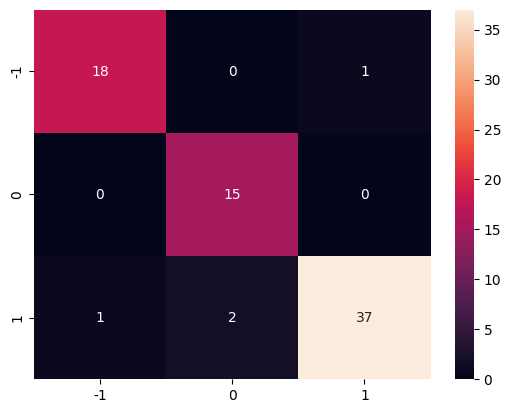

In [90]:
naive_bagOfWrods = Pipeline([('vectorizer_bow', CountVectorizer(ngram_range=(1,3))),
                ('Multi NB', MultinomialNB())])
naive_bagOfWrods.fit(x_train,y_train)
y_pred = naive_bagOfWrods.predict(x_test)
print(classification_report(y_pred,y_test))
classes=[-1,0,1]
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True,xticklabels=classes,yticklabels=classes)

<ul>
    <font color='#ddd'><li>TF-IDF</li></font>
</ul>

              precision    recall  f1-score   support

          -1       0.84      0.94      0.89        17
           0       0.41      1.00      0.58         7
           1       0.97      0.74      0.84        50

    accuracy                           0.81        74
   macro avg       0.74      0.89      0.77        74
weighted avg       0.89      0.81      0.83        74



<Axes: >

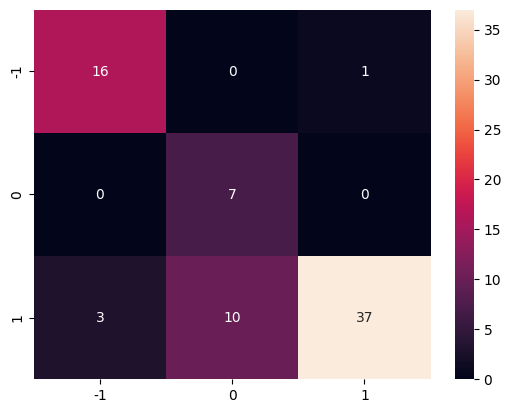

In [91]:
clf = Pipeline([('tfidf',TfidfVectorizer()),
                ('Multi NB', MultinomialNB())])
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_pred,y_test))
classes=[-1,0,1]
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True,xticklabels=classes,yticklabels=classes)

<ul>
    <font color='#ddd'><li>Word Embedding</li></font>
</ul>

<center>==================================================</center>

### <font color='#ddd'>**▶️ Logistic Regression**</font>


<ul>
    <font color='#ddd'><li>Bag Of Words</li></font>
</ul>

              precision    recall  f1-score   support

          -1       0.95      1.00      0.97        18
           0       0.71      1.00      0.83        12
           1       1.00      0.86      0.93        44

    accuracy                           0.92        74
   macro avg       0.88      0.95      0.91        74
weighted avg       0.94      0.92      0.92        74



<Axes: >

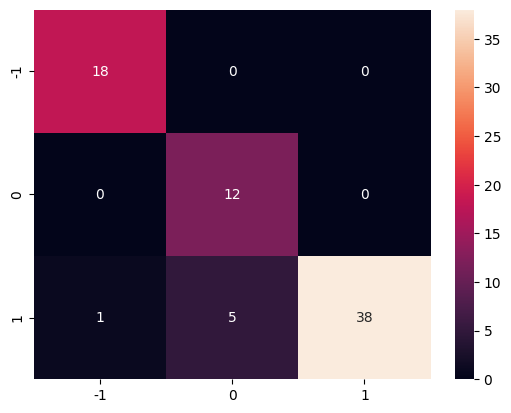

In [92]:
clf = Pipeline([('vectorizer_bow', CountVectorizer(ngram_range=(1,2))),
                ('logistic', LogisticRegression())])
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_pred,y_test))
classes=[-1,0,1]
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True,xticklabels=classes,yticklabels=classes)

<ul>
    <font color='#ddd'><li>TF-IDF</li></font>
</ul>

              precision    recall  f1-score   support

          -1       0.84      1.00      0.91        16
           0       0.53      1.00      0.69         9
           1       1.00      0.78      0.87        49

    accuracy                           0.85        74
   macro avg       0.79      0.93      0.83        74
weighted avg       0.91      0.85      0.86        74



<Axes: >

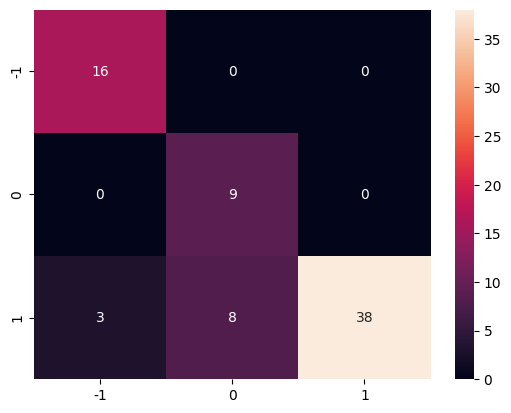

In [93]:
clf = Pipeline([('tfidf', TfidfVectorizer()),
                ('logistic', LogisticRegression())])
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_pred,y_test))
classes=[-1,0,1]
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True,xticklabels=classes,yticklabels=classes)

<ul>
    <font color='#ddd'><li>Word Embedding</li></font>
</ul>

<center>==================================================</center>

### <font color='#ddd'>**▶️ SVC**</font>

<ul>
    <font color='#ddd'><li>Bag Of Words</li></font>
</ul>

              precision    recall  f1-score   support

          -1       0.63      1.00      0.77        12
           0       0.47      1.00      0.64         8
           1       1.00      0.70      0.83        54

    accuracy                           0.78        74
   macro avg       0.70      0.90      0.75        74
weighted avg       0.88      0.78      0.80        74



<Axes: >

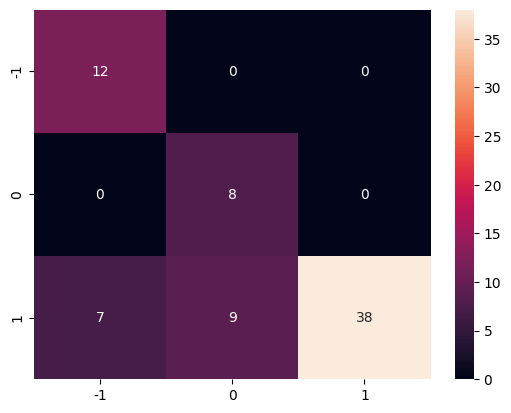

In [94]:
clf = Pipeline([('vectorizer_bow', CountVectorizer(ngram_range=(1,1))),
                ('svm', SVC())])
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_pred,y_test))
classes=[-1,0,1]
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True,xticklabels=classes,yticklabels=classes)

<ul>
    <font color='#ddd'><li>TF-IDF</li></font>
</ul>

              precision    recall  f1-score   support

          -1       0.68      1.00      0.81        13
           0       0.59      1.00      0.74        10
           1       1.00      0.75      0.85        51

    accuracy                           0.82        74
   macro avg       0.76      0.92      0.80        74
weighted avg       0.89      0.82      0.83        74



<Axes: >

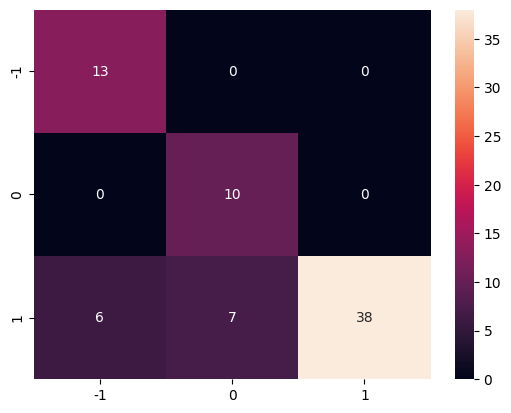

In [95]:
clf = Pipeline([('tfidf', TfidfVectorizer()),
                ('svm', SVC())])
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_pred,y_test))
classes=[-1,0,1]
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True,xticklabels=classes,yticklabels=classes)

<ul>
    <font color='#ddd'><li>Word Embedding</li></font>
</ul>

<center>==================================================</center>

### <font color='#ddd'>**▶️ Random Forest Classifier**</font>

<ul>
    <font color='#ddd'><li>Bag Of Words</li></font>
</ul>

              precision    recall  f1-score   support

          -1       0.58      0.92      0.71        12
           0       0.59      0.91      0.71        11
           1       0.97      0.73      0.83        51

    accuracy                           0.78        74
   macro avg       0.71      0.85      0.75        74
weighted avg       0.85      0.78      0.79        74



<Axes: >

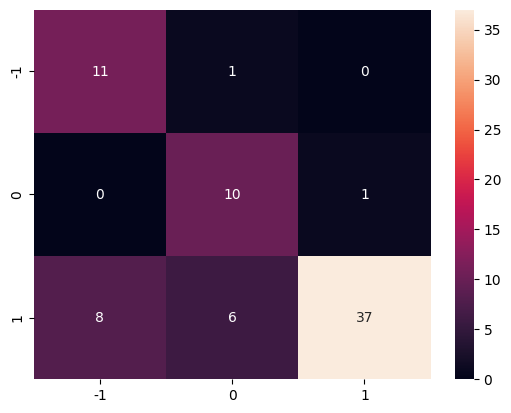

In [99]:
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,1))),
    ('rf', RandomForestClassifier(n_estimators=50, random_state=0))])
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_pred,y_test))
classes=[-1,0,1]
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True,xticklabels=classes,yticklabels=classes)

<ul>
    <font color='#ddd'><li>TF-IDF</li></font>
</ul>

              precision    recall  f1-score   support

          -1       0.74      0.93      0.82        15
           0       0.53      0.90      0.67        10
           1       0.97      0.76      0.85        49

    accuracy                           0.81        74
   macro avg       0.75      0.86      0.78        74
weighted avg       0.87      0.81      0.82        74



<Axes: >

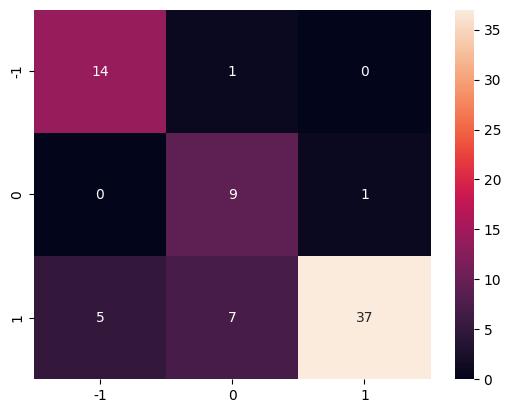

In [100]:
clf = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('rf', RandomForestClassifier(n_estimators=50, random_state=0))])
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_pred,y_test))
classes=[-1,0,1]
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True,xticklabels=classes,yticklabels=classes)

<ul>
    <font color='#ddd'><li>Word Embedding</li></font>
</ul>

<center>==================================================</center>

### <font color='#ddd'>**▶️  RNNs & LSTM**</font>

<center>==================================================</center>


### <font color='#ddd'>**▶️  Decision Tree Classifier**</font>

<ul>
    <font color='#ddd'><li>Bag Of Words</li></font>
</ul>

              precision    recall  f1-score   support

          -1       0.79      0.94      0.86        16
           0       0.71      0.92      0.80        13
           1       0.95      0.80      0.87        45

    accuracy                           0.85        74
   macro avg       0.81      0.89      0.84        74
weighted avg       0.87      0.85      0.85        74



<Axes: >

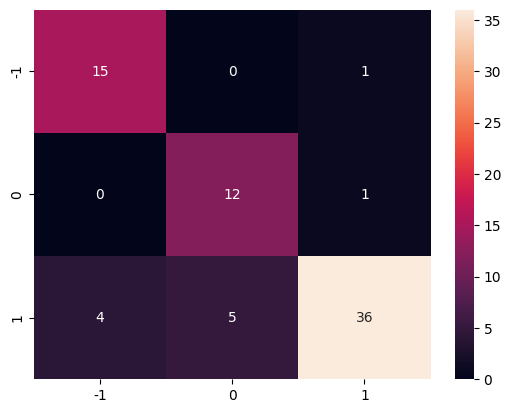

In [101]:
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,4))),        
    ('classifier', DecisionTreeClassifier(random_state=42))
])
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_pred,y_test))
classes=[-1,0,1]
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True,xticklabels=classes,yticklabels=classes)

<ul>
    <font color='#ddd'><li>TF-IDF</li></font>
</ul>

              precision    recall  f1-score   support

          -1       0.84      0.94      0.89        17
           0       0.59      0.53      0.56        19
           1       0.74      0.74      0.74        38

    accuracy                           0.73        74
   macro avg       0.72      0.73      0.73        74
weighted avg       0.72      0.73      0.73        74



<Axes: >

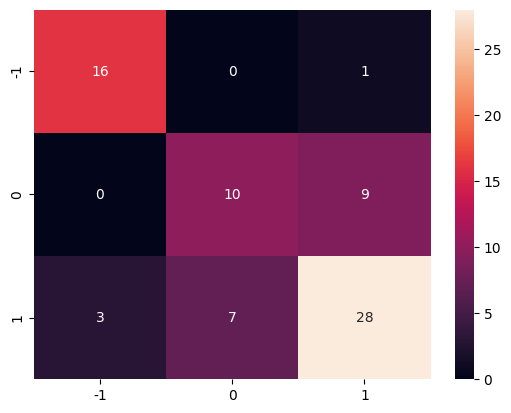

In [102]:
clf = Pipeline([
    ('tfidf',TfidfVectorizer()),        
    ('classifier', DecisionTreeClassifier(random_state=42))
])
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_pred,y_test))
classes=[-1,0,1]
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True,xticklabels=classes,yticklabels=classes)

<ul>
    <font color='#ddd'><li>Word Embedding</li></font>
</ul>

---


> ## **Understand Public Opinion**

In [ ]:
def sentiment_trends(keyword):
    # Initialize counts for positive, negative, and neutral sentiments
    positive = 0
    negative = 0
    neutral = 0
    # Assuming 'Topic' column contains strings, filter rows containing the keyword
    trends = data[data['Clean Topic'].str.contains((keyword).lower(), case=False)]
    # Iterate over each sentiment in the filtered DataFrame
    for sentiment in trends['Numerical_Sentiments']:
        # Convert sentiment to polarity
        # Update sentiment counts
        if sentiment == 1:
            positive += 1
        elif sentiment == -1:
            negative += 1
        else:
            neutral += 1
    # Check which sentiment has the highest count and print the result
    if positive > negative and positive > neutral:
        print("Positive")
    elif negative > positive and negative > neutral:
        print("Negative")
    elif neutral > positive and neutral > negative or positive == negative != 0:
        print("Neutral")
    else:
        print("not found")

keyword = input("Enter your keyword: ")
sentiment_trends(keyword)

---

> ## **Improve Customer Experience**

In [ ]:
# Assuming you have the 'data' DataFrame, 'convert_sentiment' function, and other necessary components defined
def improve(product):
    trends = data[data['Clean Topic'].str.contains((product).lower(), case=False)]
    for index, sentiment in trends['Numerical_Sentiments'].items():
        if sentiment == -1:
            print(trends.loc[index, 'Country'])
product = input("Enter your product: ")
improve(product)

---

> ## **Deployment**

In [ ]:
import pickle
file = 'SentimentFile.sav'
pickle.dump(naive_bagOfWrods,open(file,'wb'))